## Homework 4: Spectrogram

In [11]:
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image

from plotly import graph_objs as go
from plotly import express as px
import matplotlib.pyplot as plt
from scipy import fft

import warnings
warnings.filterwarnings('ignore')

In [156]:
def get_specgram(signal, timestep, window_width, overlap, window_func=np.hanning):

    step = window_width - overlap
    num_windows = (len(signal) - overlap) // step
    w = np.fft.fftfreq(window_width, d=(t[-1]-t[0])/timestep)[:window_width//2]
    intensity = np.zeros((len(w), num_windows))
    times = np.arange(0, num_windows * step, step) / timestep

    # Compute spectrum in each window
    for i in range(num_windows):
        start = i * step
        end = start + window_width
        windowed_signal = signal[start:end] * window_func(window_width)
        spectrum = np.fft.fft(windowed_signal)[:window_width//2]
        intensity[:, i] = np.abs(spectrum)**2

    return times, w, intensity

### Task 4.1

Text(0, 0.5, 'Signal, a.u.')

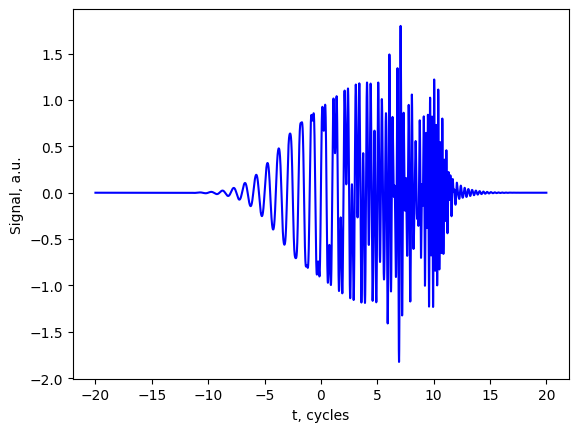

In [152]:
# generate the signal
nofts=1000
timestep = 2**14
t=np.linspace(-20*2*np.pi, 20*2*np.pi, timestep)

# 1st wave packet
y1=np.sin(t)*np.exp(-t**2/2/20**2)
# 2nd wave packet
y2=y1+np.sin(3*t)*np.exp(-(t-5*2*np.pi)**2/2/20**2)
# 3rd wave packet
y3=y2+np.sin(5.5*t)*np.exp(-(t-10*2*np.pi)**2/2/5**2)
# 4st wave packet
y4=y3+np.sin(4*t)*np.exp(-(t-7*2*np.pi)**2/2/5**2)

# Plot Signal
plt.plot(t/2/np.pi,y, color='blue')
plt.xlabel('t, cycles')
plt.ylabel('Signal, a.u.')

Text(0, 0.5, 'Power spectrum, a.u.')

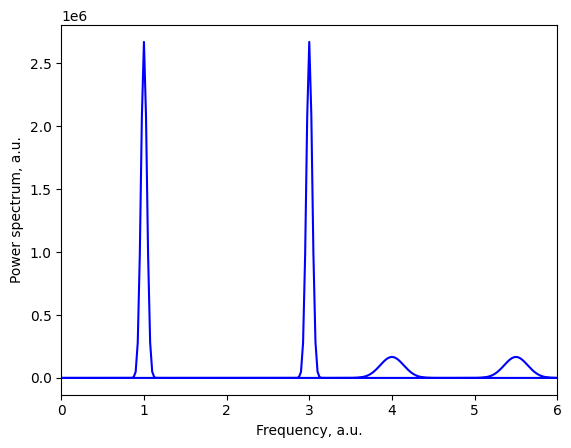

In [153]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/np.pi)
plt.plot(w, abs(sp)**2, color='blue')
plt.xlim(0,6)
plt.xlabel('Frequency, a.u.')
plt.ylabel('Power spectrum, a.u.')

### Task 4.2

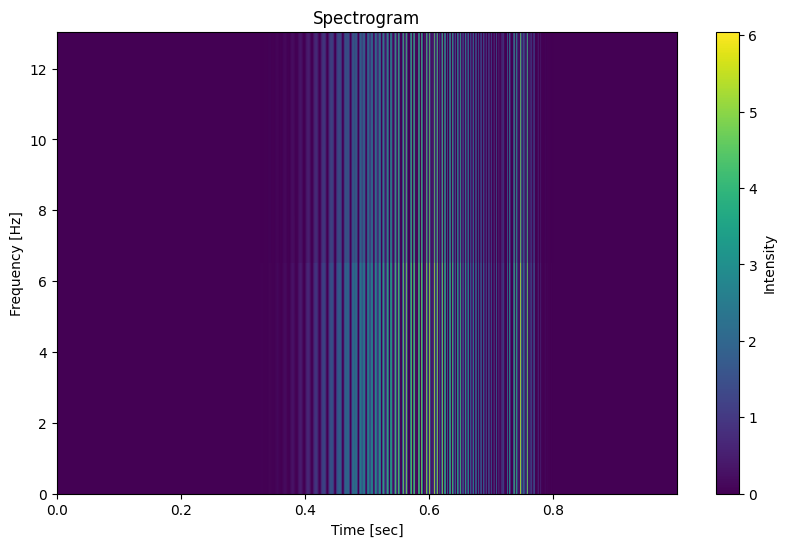

In [168]:
timestep = 2**14
t=np.linspace(-20*2*np.pi, 20*2*np.pi, timestep, endpoint=False)

window_width = 5
overlap = 3
# Compute Spectrogram
times, w, intensity = get_specgram(signal=y3, timestep=timestep, window_width=window_width, overlap=overlap)

# Plot spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, w, intensity, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label="Intensity")
plt.show()

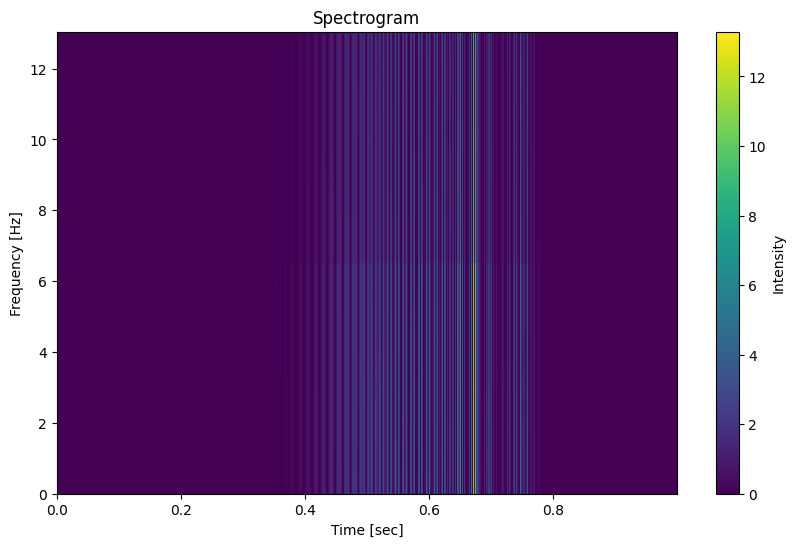

In [169]:
timestep = 2**14
t=np.linspace(-20*2*np.pi, 20*2*np.pi, timestep, endpoint=False)

window_width = 5
overlap = 3
# Compute Spectrogram
times, w, intensity = get_specgram(signal=y4, timestep=timestep, window_width=window_width, overlap=overlap)

# Plot spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, w, intensity, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label="Intensity")
plt.show()

### Task 4.3

In [ ]:
timestep = 2**14
t=np.linspace(-20*2*np.pi, 20*2*np.pi, timestep, endpoint=False)

window_width = 5
overlap = 3
# Compute Spectrogram
times, w, intensity = get_specgram(signal=y4, timestep=timestep, window_width=window_width, overlap=overlap)

# Plot spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, w, intensity, shading='gouraud')
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label="Intensity")
plt.show()